In [1]:
import json
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from utils.histogram import hsi_to_rgb
import tensorflow as tf

2026-02-03 21:26:48.476483: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-03 21:26:48.506510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-03 21:26:49.321193: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/libi/projects/personal/enginearing-our-limits/env/lib/python3.

In [2]:
model_path = "/home/libi/projects/personal/enginearing-our-limits/results/lineRWKV_2026_01_14-00_33_25/logs/training_history.json"

In [3]:
model_history = model_path
if not os.path.exists(model_history):
    print(f"Model history file {model_history} does not exist.")
    raise FileNotFoundError(f"Model history file {model_history} does not exist.")

history = {}
with open(model_history, "r") as f:
    history = json.load(f)

In [4]:
results_txt = """2026-02-02 15:15:26.481277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 941 of 1000
2026-02-02 15:15:27.072897: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2026-02-02 15:29:54.140753: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-02 15:30:42.927944: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
 [NEW BEST]
Epoch 1/120 - Train Loss: 0.2482 | Train Acc: 0.9256 | Val Loss: 0.2432 | Val Acc: 0.9056 | Val mIoU: 0.5556
2026-02-02 15:45:52.122543: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
 [NEW BEST]
Epoch 2/120 - Train Loss: 0.1517 | Train Acc: 0.9513 | Val Loss: 0.1416 | Val Acc: 0.9487 | Val mIoU: 0.6311
Epoch 3/120 - Train Loss: 0.1303 | Train Acc: 0.9570 | Val Loss: 0.5441 | Val Acc: 0.8126 | Val mIoU: 0.5197
2026-02-02 16:01:10.971895: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 664 of 1000
2026-02-02 16:01:17.253341: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2026-02-02 16:16:12.617761: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
 [NEW BEST]
Epoch 4/120 - Train Loss: 0.1234 | Train Acc: 0.9578 | Val Loss: 0.1094 | Val Acc: 0.9678 | Val mIoU: 0.6923
2026-02-02 16:16:22.828350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 967 of 1000
2026-02-02 16:16:23.458447: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 5/120 - Train Loss: 0.1091 | Train Acc: 0.9618 | Val Loss: 0.1334 | Val Acc: 0.9362 | Val mIoU: 0.6501
 [NEW BEST]74/574
Epoch 6/120 - Train Loss: 0.1027 | Train Acc: 0.9632 | Val Loss: 0.0921 | Val Acc: 0.9681 | Val mIoU: 0.6876
Epoch 7/120 - Train Loss: 0.1015 | Train Acc: 0.9642 | Val Loss: 0.1499 | Val Acc: 0.9449 | Val mIoU: 0.6296
2026-02-02 17:17:57.534449: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
Epoch 8/120 - Train Loss: 0.1029 | Train Acc: 0.9641 | Val Loss: 0.1055 | Val Acc: 0.9639 | Val mIoU: 0.6638
Epoch 9/120 - Train Loss: 0.0895 | Train Acc: 0.9692 | Val Loss: 0.0966 | Val Acc: 0.9632 | Val mIoU: 0.6620
Epoch 10/120 - Train Loss: 0.0853 | Train Acc: 0.9705 | Val Loss: 0.1132 | Val Acc: 0.9571 | Val mIoU: 0.6305
 [NEW BEST]74/574
Epoch 11/120 - Train Loss: 0.0769 | Train Acc: 0.9727 | Val Loss: 0.0862 | Val Acc: 0.9695 | Val mIoU: 0.7264
Epoch 12/120 - Train Loss: 0.0765 | Train Acc: 0.9729 | Val Loss: 0.0982 | Val Acc: 0.9654 | Val mIoU: 0.6522
Epoch 13/120 - Train Loss: 0.0767 | Train Acc: 0.9740 | Val Loss: 0.0864 | Val Acc: 0.9670 | Val mIoU: 0.6919
 [NEW BEST]74/574
Epoch 14/120 - Train Loss: 0.0697 | Train Acc: 0.9755 | Val Loss: 0.0860 | Val Acc: 0.9694 | Val mIoU: 0.7081
 [NEW BEST]74/574
Epoch 15/120 - Train Loss: 0.0685 | Train Acc: 0.9761 | Val Loss: 0.0745 | Val Acc: 0.9718 | Val mIoU: 0.7386
2026-02-02 19:21:01.806924: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
 [NEW BEST]
Epoch 16/120 - Train Loss: 0.0674 | Train Acc: 0.9765 | Val Loss: 0.0691 | Val Acc: 0.9749 | Val mIoU: 0.7459
2026-02-02 19:21:12.042066: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 787 of 1000
2026-02-02 19:21:13.863667: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 17/120 - Train Loss: 0.0668 | Train Acc: 0.9763 | Val Loss: 0.0954 | Val Acc: 0.9680 | Val mIoU: 0.6920
Epoch 18/120 - Train Loss: 0.0610 | Train Acc: 0.9783 | Val Loss: 0.0823 | Val Acc: 0.9688 | Val mIoU: 0.7318
 [NEW BEST]74/574
Epoch 19/120 - Train Loss: 0.0591 | Train Acc: 0.9788 | Val Loss: 0.0654 | Val Acc: 0.9764 | Val mIoU: 0.7467
 [NEW BEST]74/574
Epoch 20/120 - Train Loss: 0.0607 | Train Acc: 0.9785 | Val Loss: 0.0637 | Val Acc: 0.9775 | Val mIoU: 0.7388
2026-02-02 20:22:44.454890: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 662 of 1000
2026-02-02 20:22:51.285149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 21/120 - Train Loss: 0.0612 | Train Acc: 0.9783 | Val Loss: 0.0933 | Val Acc: 0.9632 | Val mIoU: 0.6872
Epoch 22/120 - Train Loss: 0.0559 | Train Acc: 0.9798 | Val Loss: 0.0739 | Val Acc: 0.9722 | Val mIoU: 0.7304
2026-02-02 20:53:52.349516: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 781 of 1000
2026-02-02 20:53:55.772862: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 23/120 - Train Loss: 0.0569 | Train Acc: 0.9802 | Val Loss: 0.1218 | Val Acc: 0.9634 | Val mIoU: 0.7141
2026-02-02 21:09:50.148134: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 688 of 1000
2026-02-02 21:09:53.647029: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 24/120 - Train Loss: 0.0584 | Train Acc: 0.9797 | Val Loss: 0.0619 | Val Acc: 0.9758 | Val mIoU: 0.7443
2026-02-02 21:26:08.611653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 664 of 1000
2026-02-02 21:26:13.357396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 25/120 - Train Loss: 0.0533 | Train Acc: 0.9809 | Val Loss: 0.1086 | Val Acc: 0.9660 | Val mIoU: 0.7060
2026-02-02 21:42:24.909732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 654 of 1000
2026-02-02 21:42:29.461033: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 26/120 - Train Loss: 0.0591 | Train Acc: 0.9798 | Val Loss: 0.1131 | Val Acc: 0.9649 | Val mIoU: 0.7222
2026-02-02 21:58:45.067511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 591 of 1000
2026-02-02 21:58:50.906629: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 27/120 - Train Loss: 0.0543 | Train Acc: 0.9807 | Val Loss: 0.0558 | Val Acc: 0.9780 | Val mIoU: 0.7596
2026-02-02 22:14:54.455479: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 969 of 1000
2026-02-02 22:14:54.795177: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 28/120 - Train Loss: 0.0528 | Train Acc: 0.9812 | Val Loss: 0.0621 | Val Acc: 0.9782 | Val mIoU: 0.7491
2026-02-02 22:31:19.827495: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 576 of 1000
2026-02-02 22:31:27.438903: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 29/120 - Train Loss: 0.0523 | Train Acc: 0.9817 | Val Loss: 0.0584 | Val Acc: 0.9799 | Val mIoU: 0.7524
2026-02-02 22:47:43.235053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 909 of 1000
2026-02-02 22:47:44.177913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 30/120 - Train Loss: 0.0503 | Train Acc: 0.9822 | Val Loss: 0.0693 | Val Acc: 0.9731 | Val mIoU: 0.7470
2026-02-02 23:03:57.491286: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 918 of 1000
2026-02-02 23:03:58.302350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 31/120 - Train Loss: 0.0520 | Train Acc: 0.9816 | Val Loss: 0.0609 | Val Acc: 0.9765 | Val mIoU: 0.7489
2026-02-02 23:20:16.083794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 849 of 1000
2026-02-02 23:20:18.114687: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
2026-02-02 23:35:34.895855: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
Epoch 32/120 - Train Loss: 0.0513 | Train Acc: 0.9820 | Val Loss: 0.0674 | Val Acc: 0.9757 | Val mIoU: 0.7578
2026-02-02 23:35:45.143239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 684 of 1000
2026-02-02 23:35:53.384802: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 33/120 - Train Loss: 0.0484 | Train Acc: 0.9827 | Val Loss: 0.0622 | Val Acc: 0.9794 | Val mIoU: 0.7653
Epoch 34/120 - Train Loss: 0.0508 | Train Acc: 0.9827 | Val Loss: 0.0624 | Val Acc: 0.9768 | Val mIoU: 0.7698
Epoch 35/120 - Train Loss: 0.0473 | Train Acc: 0.9831 | Val Loss: 0.0702 | Val Acc: 0.9772 | Val mIoU: 0.7658
 [NEW BEST]74/574
Epoch 36/120 - Train Loss: 0.0482 | Train Acc: 0.9832 | Val Loss: 0.0512 | Val Acc: 0.9812 | Val mIoU: 0.7530
 [NEW BEST]74/574
Epoch 37/120 - Train Loss: 0.0490 | Train Acc: 0.9829 | Val Loss: 0.0509 | Val Acc: 0.9821 | Val mIoU: 0.7809
Epoch 38/120 - Train Loss: 0.0458 | Train Acc: 0.9839 | Val Loss: 0.0610 | Val Acc: 0.9815 | Val mIoU: 0.7780
2026-02-03 01:11:48.697937: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 954 of 1000
2026-02-03 01:11:49.411594: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 39/120 - Train Loss: 0.0508 | Train Acc: 0.9831 | Val Loss: 0.0511 | Val Acc: 0.9811 | Val mIoU: 0.7634
2026-02-03 01:28:29.444944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 985 of 1000
2026-02-03 01:28:29.614054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 40/120 - Train Loss: 0.0453 | Train Acc: 0.9836 | Val Loss: 0.0479 | Val Acc: 0.9824 | Val mIoU: 0.7769
2026-02-03 01:44:49.967280: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 988 of 1000
2026-02-03 01:44:50.134048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 41/120 - Train Loss: 0.0467 | Train Acc: 0.9843 | Val Loss: 0.0572 | Val Acc: 0.9788 | Val mIoU: 0.7752
2026-02-03 02:00:56.887894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 980 of 1000
2026-02-03 02:00:57.071206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 42/120 - Train Loss: 0.0420 | Train Acc: 0.9849 | Val Loss: 0.0445 | Val Acc: 0.9838 | Val mIoU: 0.7633
Epoch 43/120 - Train Loss: 0.0414 | Train Acc: 0.9852 | Val Loss: 0.0504 | Val Acc: 0.9835 | Val mIoU: 0.7590
2026-02-03 02:31:39.673057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 988 of 1000
2026-02-03 02:31:39.886136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 44/120 - Train Loss: 0.0420 | Train Acc: 0.9850 | Val Loss: 0.0545 | Val Acc: 0.9798 | Val mIoU: 0.7422
2026-02-03 02:47:38.863369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 965 of 1000
2026-02-03 02:47:39.348871: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 45/120 - Train Loss: 0.0426 | Train Acc: 0.9845 | Val Loss: 0.0397 | Val Acc: 0.9852 | Val mIoU: 0.7939
Epoch 46/120 - Train Loss: 0.0419 | Train Acc: 0.9850 | Val Loss: 0.0487 | Val Acc: 0.9839 | Val mIoU: 0.7810
2026-02-03 03:20:03.691624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 993 of 1000
2026-02-03 03:20:03.756871: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 47/120 - Train Loss: 0.0424 | Train Acc: 0.9854 | Val Loss: 0.0541 | Val Acc: 0.9802 | Val mIoU: 0.7878
Epoch 48/120 - Train Loss: 0.0411 | Train Acc: 0.9854 | Val Loss: 0.0456 | Val Acc: 0.9856 | Val mIoU: 0.7957
Epoch 49/120 - Train Loss: 0.0424 | Train Acc: 0.9851 | Val Loss: 0.0588 | Val Acc: 0.9795 | Val mIoU: 0.7657
 [NEW BEST]74/574
Epoch 50/120 - Train Loss: 0.0374 | Train Acc: 0.9867 | Val Loss: 0.0395 | Val Acc: 0.9860 | Val mIoU: 0.8048
Epoch 51/120 - Train Loss: 0.0417 | Train Acc: 0.9852 | Val Loss: 0.0920 | Val Acc: 0.9732 | Val mIoU: 0.7394
Epoch 52/120 - Train Loss: 0.0409 | Train Acc: 0.9857 | Val Loss: 0.0415 | Val Acc: 0.9861 | Val mIoU: 0.8027
Epoch 53/120 - Train Loss: 0.0412 | Train Acc: 0.9856 | Val Loss: 0.0421 | Val Acc: 0.9852 | Val mIoU: 0.7959
Epoch 54/120 - Train Loss: 0.0380 | Train Acc: 0.9868 | Val Loss: 0.0459 | Val Acc: 0.9838 | Val mIoU: 0.7917
2026-02-03 05:24:05.230887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 832 of 1000
2026-02-03 05:24:07.170084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 55/120 - Train Loss: 0.0374 | Train Acc: 0.9867 | Val Loss: 0.0442 | Val Acc: 0.9860 | Val mIoU: 0.8045
 [NEW BEST]74/574
Epoch 56/120 - Train Loss: 0.0381 | Train Acc: 0.9863 | Val Loss: 0.0391 | Val Acc: 0.9861 | Val mIoU: 0.7990
Epoch 57/120 - Train Loss: 0.0405 | Train Acc: 0.9859 | Val Loss: 0.0451 | Val Acc: 0.9835 | Val mIoU: 0.7924
Epoch 58/120 - Train Loss: 0.0385 | Train Acc: 0.9863 | Val Loss: 0.0753 | Val Acc: 0.9744 | Val mIoU: 0.7584
 [NEW BEST]74/574
Epoch 59/120 - Train Loss: 0.0370 | Train Acc: 0.9871 | Val Loss: 0.0390 | Val Acc: 0.9855 | Val mIoU: 0.8100
Epoch 60/120 - Train Loss: 0.0404 | Train Acc: 0.9873 | Val Loss: 0.0569 | Val Acc: 0.9822 | Val mIoU: 0.7871
 [NEW BEST]74/574
Epoch 61/120 - Train Loss: 0.0382 | Train Acc: 0.9867 | Val Loss: 0.0347 | Val Acc: 0.9877 | Val mIoU: 0.8166
Epoch 62/120 - Train Loss: 0.0368 | Train Acc: 0.9868 | Val Loss: 0.0991 | Val Acc: 0.9715 | Val mIoU: 0.7259
Epoch 63/120 - Train Loss: 0.0361 | Train Acc: 0.9873 | Val Loss: 0.0442 | Val Acc: 0.9853 | Val mIoU: 0.7915
2026-02-03 07:55:03.673412: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
Epoch 64/120 - Train Loss: 0.0421 | Train Acc: 0.9863 | Val Loss: 0.0405 | Val Acc: 0.9860 | Val mIoU: 0.7870
 [NEW BEST]74/574
Epoch 65/120 - Train Loss: 0.0350 | Train Acc: 0.9878 | Val Loss: 0.0321 | Val Acc: 0.9884 | Val mIoU: 0.7983
Epoch 66/120 - Train Loss: 0.0396 | Train Acc: 0.9869 | Val Loss: 0.0352 | Val Acc: 0.9874 | Val mIoU: 0.8211
Epoch 67/120 - Train Loss: 0.0339 | Train Acc: 0.9880 | Val Loss: 0.0349 | Val Acc: 0.9875 | Val mIoU: 0.8176
Epoch 68/120 - Train Loss: 0.0357 | Train Acc: 0.9875 | Val Loss: 0.0444 | Val Acc: 0.9846 | Val mIoU: 0.8013
2026-02-03 08:55:40.842277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 858 of 1000
2026-02-03 08:55:43.454434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
 [NEW BEST]74/574
Epoch 69/120 - Train Loss: 0.0388 | Train Acc: 0.9871 | Val Loss: 0.0305 | Val Acc: 0.9895 | Val mIoU: 0.8242
Epoch 70/120 - Train Loss: 0.0378 | Train Acc: 0.9880 | Val Loss: 0.0392 | Val Acc: 0.9869 | Val mIoU: 0.7538
Epoch 71/120 - Train Loss: 0.0342 | Train Acc: 0.9879 | Val Loss: 0.0431 | Val Acc: 0.9840 | Val mIoU: 0.8040
Epoch 72/120 - Train Loss: 0.0405 | Train Acc: 0.9872 | Val Loss: 0.0359 | Val Acc: 0.9863 | Val mIoU: 0.8006
Epoch 73/120 - Train Loss: 0.0383 | Train Acc: 0.9876 | Val Loss: 0.0454 | Val Acc: 0.9832 | Val mIoU: 0.7898
Epoch 74/120 - Train Loss: 0.0350 | Train Acc: 0.9876 | Val Loss: 0.0363 | Val Acc: 0.9873 | Val mIoU: 0.8037
Epoch 75/120 - Train Loss: 0.0348 | Train Acc: 0.9876 | Val Loss: 0.0334 | Val Acc: 0.9878 | Val mIoU: 0.7870
Epoch 76/120 - Train Loss: 0.0328 | Train Acc: 0.9884 | Val Loss: 0.0396 | Val Acc: 0.9858 | Val mIoU: 0.7843
2026-02-03 10:57:07.478776: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:453] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 538 of 1000
2026-02-03 10:57:14.566162: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:483] Shuffle buffer filled.
Epoch 77/120 - Train Loss: 0.0344 | Train Acc: 0.9880 | Val Loss: 0.0333 | Val Acc: 0.9880 | Val mIoU: 0.8112
Epoch 78/120 - Train Loss: 0.0320 | Train Acc: 0.9886 | Val Loss: 0.0396 | Val Acc: 0.9856 | Val mIoU: 0.8139
Epoch 79/120 - Train Loss: 0.0326 | Train Acc: 0.9885 | Val Loss: 0.0452 | Val Acc: 0.9837 | Val mIoU: 0.7515
Epoch 80/120 - Train Loss: 0.0342 | Train Acc: 0.9882 | Val Loss: 0.0388 | Val Acc: 0.9868 | Val mIoU: 0.8104"""

In [5]:
history = {}
for line in results_txt.split("\n"):
    if "Epoch" in line:
        for metricandvalue in line.split(" - ")[1].split(" | "):
            metric = metricandvalue.split(": ")[0]
            value = float(metricandvalue.split(": ")[1])
            print(f"{metric}: {value}")
            if metric == "Train Loss":
                if "train_loss" not in history:
                    history["train_loss"] = []
                history["train_loss"].append(value)
            elif metric == "Val Loss":
                if "val_loss" not in history:
                    history["val_loss"] = []
                history["val_loss"].append(value)
            elif metric == "Train Acc":
                if "train_acc" not in history:
                    history["train_acc"] = []
                history["train_acc"].append(value)
            elif metric == "Val Acc":
                if "val_acc" not in history:
                    history["val_acc"] = []
                history["val_acc"].append(value)
            elif metric == "Val mIoU":
                if "val_miou" not in history:
                    history["val_miou"] = []
                history["val_miou"].append(value)

Train Loss: 0.2482
Train Acc: 0.9256
Val Loss: 0.2432
Val Acc: 0.9056
Val mIoU: 0.5556
Train Loss: 0.1517
Train Acc: 0.9513
Val Loss: 0.1416
Val Acc: 0.9487
Val mIoU: 0.6311
Train Loss: 0.1303
Train Acc: 0.957
Val Loss: 0.5441
Val Acc: 0.8126
Val mIoU: 0.5197
Train Loss: 0.1234
Train Acc: 0.9578
Val Loss: 0.1094
Val Acc: 0.9678
Val mIoU: 0.6923
Train Loss: 0.1091
Train Acc: 0.9618
Val Loss: 0.1334
Val Acc: 0.9362
Val mIoU: 0.6501
Train Loss: 0.1027
Train Acc: 0.9632
Val Loss: 0.0921
Val Acc: 0.9681
Val mIoU: 0.6876
Train Loss: 0.1015
Train Acc: 0.9642
Val Loss: 0.1499
Val Acc: 0.9449
Val mIoU: 0.6296
Train Loss: 0.1029
Train Acc: 0.9641
Val Loss: 0.1055
Val Acc: 0.9639
Val mIoU: 0.6638
Train Loss: 0.0895
Train Acc: 0.9692
Val Loss: 0.0966
Val Acc: 0.9632
Val mIoU: 0.662
Train Loss: 0.0853
Train Acc: 0.9705
Val Loss: 0.1132
Val Acc: 0.9571
Val mIoU: 0.6305
Train Loss: 0.0769
Train Acc: 0.9727
Val Loss: 0.0862
Val Acc: 0.9695
Val mIoU: 0.7264
Train Loss: 0.0765
Train Acc: 0.9729
Val Loss

In [6]:
print(history.keys())


dict_keys(['train_loss', 'train_acc', 'val_loss', 'val_acc', 'val_miou'])


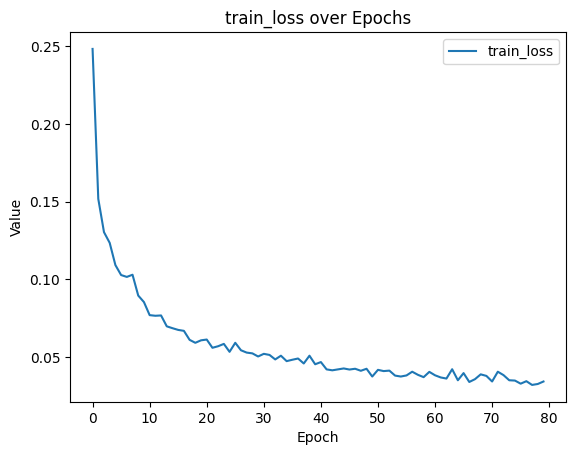

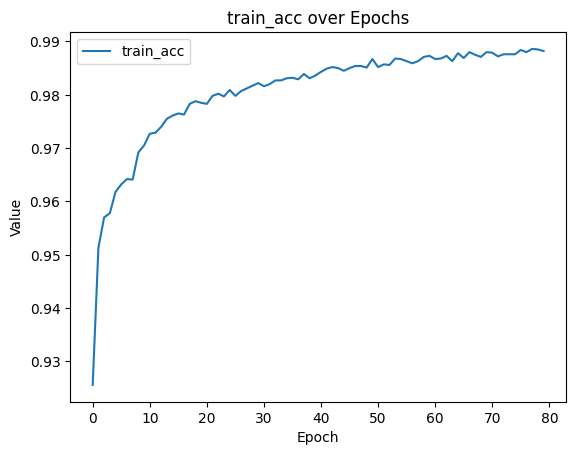

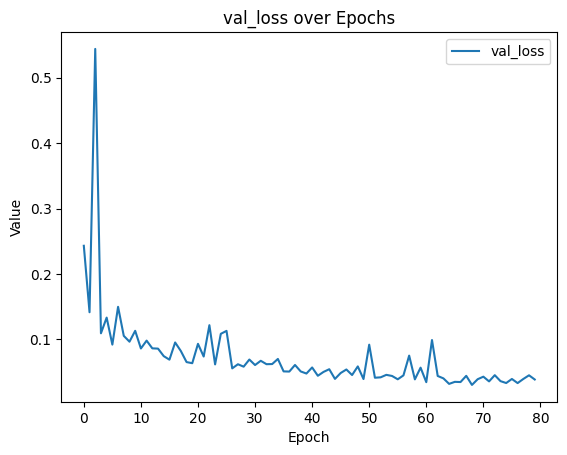

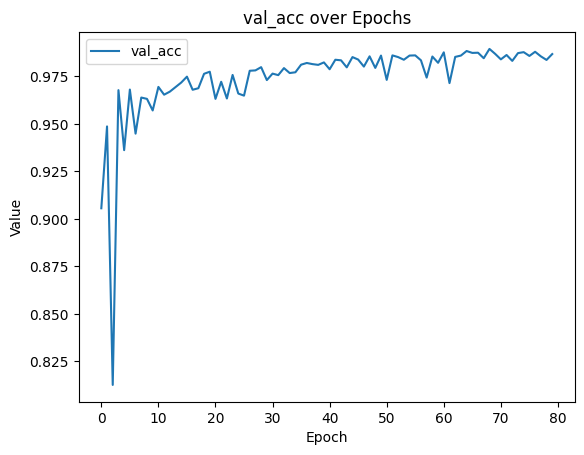

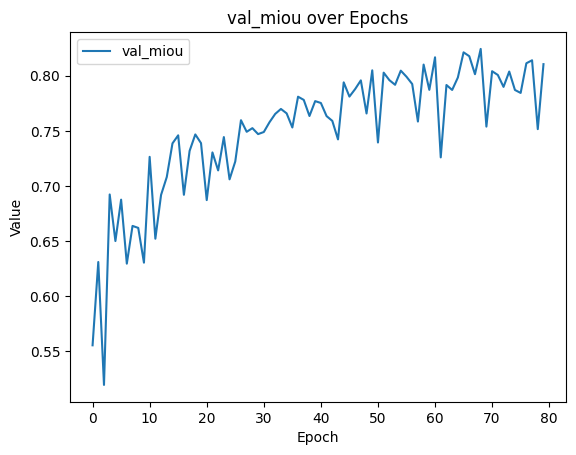

In [7]:
for key in history:
    plt.plot(history[key], label=key)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title(f"{key} over Epochs")
    plt.legend()
    plt.show()

In [8]:
data_sorted = {}
for key in history:
    if key == "epoch_times":
        continue
    if key.split("_")[1] not in data_sorted:
        data_sorted[key.split("_")[1]] = {}
    if key.startswith("val"):
        data_sorted[key.split("_")[1]]["val"] = history[key]
    else:
        data_sorted[key.split("_")[1]]["train"] = history[key]

translation_dict = {
    "loss": "Loss _0",
    "acc": "Accuracy _1",
    "sa": "SA _5",
    "psnr": "PSNR _6",
    "ssim": "SSIM _4",
    "mse": "MSE _1",
    "mae": "MAE _2",
    "rmse": "RMSE _3",
}

def sorting_key_func(key):
    if key in translation_dict:
        if key == "loss":
            return 0
        else:
            return int(translation_dict[key.split].split("_")[1])

    return len(translation_dict) + 1


In [9]:
# Format data to paste into latex tikzpicture graph

template = """
\\begin{figure}
\\centering
"""


for idx, key in enumerate(sorted(data_sorted.keys(), key=lambda x: x.lower())):
    if key not in translation_dict:
        continue
    subfig = f"""
    \\begin{{subfigure}}{{0.4\\textwidth}}
        \\centering
        \\begin{{tikzpicture}}
            \\begin{{axis}}[
                    xlabel={{Training Epoch}},
                    ylabel={{Value}},
                    title={{{translation_dict[key]} over Epochs}},
                    grid=major,
                    y tick label style={{
                            /pgf/number format/.cd,
                            fixed,
                            fixed zerofill,
                            precision=2,
                            /tikz/.cd
                        }},
                    x tick label style={{
                            /pgf/number format/.cd,
                            fixed,
                            fixed zerofill,
                            precision=0,
                            /tikz/.cd
                        }}
                ]
    """
    data = data_sorted[key]["val"]
    formatted_data_val = "\n ".join([f"({i}, {v})" for i, v in enumerate(data)])
    subfig += f"""
        \\addplot [color=blue, mark=o] coordinates {{
            {formatted_data_val}
        }};
        \\addlegendentry{{Validation}}
    """
    data = data_sorted[key]["train"]
    formatted_data_train = "\n ".join([f"({i}, {v})"
    for i, v in enumerate(data)])
    subfig += f"""
        \\addplot [color=orange, mark=x] coordinates {{
            {formatted_data_train}
        }};
        \\addlegendentry{{Training}}
    
        \\end{{axis}}
        \\end{{tikzpicture}}
        \\caption{{CHANGE ME!!!}}
        \\label{{fig:{key}}}
    \\end{{subfigure}}
    \\hfill
    """
    template += subfig
template += """
\\caption{Training and Validation Metrics over Epochs}
\\label{fig:training_metrics}
\\end{figure}
"""

print(template)

    # print(f"{key} data for TikZ: {formatted_data}")


\begin{figure}
\centering

    \begin{subfigure}{0.4\textwidth}
        \centering
        \begin{tikzpicture}
            \begin{axis}[
                    xlabel={Training Epoch},
                    ylabel={Value},
                    title={Accuracy _1 over Epochs},
                    grid=major,
                    y tick label style={
                            /pgf/number format/.cd,
                            fixed,
                            fixed zerofill,
                            precision=2,
                            /tikz/.cd
                        },
                    x tick label style={
                            /pgf/number format/.cd,
                            fixed,
                            fixed zerofill,
                            precision=0,
                            /tikz/.cd
                        }
                ]
    
        \addplot [color=blue, mark=o] coordinates {
            (0, 0.9056)
 (1, 0.9487)
 (2, 0.8126)
 (3, 0.9678)
 (4

In [11]:
# Load small_seg model for visualization
from segmentation.small_seg import small_segmenter

# Create model with same config as training
seg_model = small_segmenter(
    input_shape=(128, 128, 202, 1),
    num_classes=4,
    base_filters=8,
    depth=3,
    dropout_rate=0.1
)

# Build model with dummy input
dummy_input = tf.random.normal([1, 128, 128, 202, 1])
_ = seg_model(dummy_input, training=False)

# Load best weights
weights_path = "/home/libi/projects/personal/enginearing-our-limits/output/models/small_seg_best.weights.h5"
seg_model.load_weights(weights_path)
print(f"Model loaded from: {weights_path}")

# Display model summary
seg_model.summary()

Model loaded from: /home/libi/projects/personal/enginearing-our-limits/output/models/small_seg_best.weights.h5


Model: "small_segmenter"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ initial_conv3d (Conv3D)         │ (1, 128, 128, 202, 8)  │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ initial_bn (BatchNormalization) │ (1, 128, 128, 202, 8)  │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ initial_relu (ReLU)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv3d_0 (Conv3D)       │ (1, 128, 128, 202, 8)  │         2,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bn_0                    │ (1, 128, 128, 202, 8)  │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_relu_0 (ReLU)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_pool_0 (MaxPooling3D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv3d_1 (Conv3D)       │ (1, 128, 128, 101, 16) │         5,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bn_1                    │ (1, 128, 128, 101, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_relu_1 (ReLU)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_pool_1 (MaxPooling3D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_conv3d_2 (Conv3D)       │ (1, 128, 128, 51, 32)  │        23,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_bn_2                    │ (1, 128, 128, 51, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder_relu_2 (ReLU)           │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_pool_2 (MaxPooling3D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ collapse_conv3d (Conv3D)        │ (1, 128, 128, 26, 64)  │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ collapse_bn                     │ (1, 128, 128, 26, 64)  │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ collapse_relu (ReLU)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refine_conv2d_1 (Conv2D)        │ (1, 128, 128, 32)      │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refine_bn_1                     │ (1, 128, 128, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refine_relu_1 (ReLU)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ refine_conv2d_2 (Conv2D)        │ (1, 128, 128, 16)      │         4,624 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 58,220 (227.42 KB)

 Trainable params: 57,868 (226.05 KB)

 Non-trainable params: 352 (1.38 KB)

In [15]:
# Visualizing segmentation predictions vs ground truth
from TFDataloader.TFdataloader import TFHySpecNetLoader
from matplotlib.colors import ListedColormap
import random

# Create constant colormap: 0=Black - None, 1=Blue - Land, 2=Green - Water, 3=Red - Background
class_colors = ['black', 'blue', 'green', 'red']
constant_cmap = ListedColormap(class_colors)

def visualize_segmentation_comparison(image, gt_mask, pred_mask, save_dir=None, sample_num=None):
    """Save images only if save_dir and sample_num provided. No display, no borders, no titles."""
    
    if not (save_dir and sample_num):
        return
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    if os.path.exists(os.path.join(save_dir, f"sample_{sample_num:02d}_input.png")):
        print(f"Sample {sample_num:02d} already exists. Skipping...")
        return
    # Input Image
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(hsi_to_rgb(image.numpy()))
    ax.axis("off")
    input_path = os.path.join(save_dir, f"sample_{sample_num:02d}_input.png")
    fig.savefig(input_path, dpi=150, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    print(f"Saved: {input_path}")
    
    # Ground Truth Mask
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(gt_mask, cmap=constant_cmap, vmin=0, vmax=3)
    ax.axis("off")
    gt_path = os.path.join(save_dir, f"sample_{sample_num:02d}_gt.png")
    fig.savefig(gt_path, dpi=150, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    print(f"Saved: {gt_path}")
    
    # Model Prediction
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(pred_mask, cmap=constant_cmap, vmin=0, vmax=3)
    ax.axis("off")
    pred_path = os.path.join(save_dir, f"sample_{sample_num:02d}_pred.png")
    fig.savefig(pred_path, dpi=150, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    print(f"Saved: {pred_path}")


# Load test data
data_loader = TFHySpecNetLoader(
    "/home/libi/projects/personal/enginearing-our-limits/test_data/hyspecnet-11k/",
    batch_size=1, 
    data_mode=3, 
    split="test"
)
data_set = data_loader._create_dataset(1000)

# Convert dataset to list for random sampling
print("Loading dataset samples...")
dataset_samples = []
for images, masks in data_set:
    # Only keep samples with multiple classes
    counts = tf.unique(tf.reshape(masks[0], [-1])).y
    if counts.shape[0] >= 2:
        dataset_samples.append((images, masks))

print(f"Found {len(dataset_samples)} multi-class samples")

# Randomly select samples to visualize
num_to_show = 40

random_samples = random.sample(dataset_samples, min(num_to_show, len(dataset_samples)))

for idx, (images, masks) in enumerate(random_samples):
    image = images[0].numpy().squeeze()
    image_reshuffled = tf.transpose(image, [0, 1, 2])
    
    # Run model prediction
    pred_probs = seg_model(images, training=False)  # (1, 128, 128, 4)
    pred_mask = tf.argmax(pred_probs[0], axis=-1).numpy()  # (128, 128)
    gt_mask = masks[0].numpy()  # (128, 128)
    
    # Visualize comparison
    counts = tf.unique(tf.reshape(masks[0], [-1])).y
    print(f"Sample {idx + 1} - Unique GT classes: {counts.numpy()}")
    visualize_segmentation_comparison(image_reshuffled, gt_mask, pred_mask,
                                      save_dir="/home/libi/projects/personal/enginearing-our-limits/Latex/graf", sample_num=idx + 1)

print(f"\nVisualizations complete. Showed {len(random_samples)} random samples.")

3
1149
1149
Loading dataset samples...


2026-02-03 21:39:04.179516: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Found 493 multi-class samples
Sample 1 - Unique GT classes: [0 1]
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_01_input.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_01_gt.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_01_pred.png
Sample 2 - Unique GT classes: [2 1]
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_02_input.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_02_gt.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_02_pred.png
Sample 3 - Unique GT classes: [2 1]
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_03_input.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_03_gt.png
Saved: /home/libi/projects/personal/enginearing-our-limits/Latex/graf/sample_03_pred.png
Sample 4 - Unique GT classes: [1 2 0]
Saved: /home/libi/projects